In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
class Modify():
  def __init__(self):
    pass

  def fit(self, X):
    self.min = X.min(axis=0)
    self.max = X.max(axis=0)
    self.mean = X.mean(axis=0)
    self.err = 1e-8
    self.std = X.std(axis=0) + self.err
    self.range = self.max-self.min + self.err

  def norm(self, X):
    try:
      return (X-self.min)/self.range
    except Exception as error_type:
      print("Error: ", error_type)

  def z_score(self, X):
    try:
      return (X-self.mean)/self.std
    except Exception as error_type:
      print("Error: ", error_type)

In [ ]:
class multivLin_Reg():
    def __init__(self, lr=0.1, p=1000):
        self.lr = lr
        self.p = p

    def fit(self, X, Y):
        X = np.array(X)
        Y = np.array(Y).reshape(-1,1)
        self.modify = Modify()
        self.modify.fit(X)
        X = self.modify.z_score(X)
        m, n = X.shape
        self.w = np.zeros(n).reshape(n,1)
        self.b = 0
        P = np.linspace(0, self.p, self.p+1)
        L = []

        for u in range(self.p):
            y_pred = (X @ self.w + self.b).reshape(-1, 1)
            loss = np.mean((y_pred - Y)**2)
            L.append(loss)

            if (u>10) and (u%10==0):
              if (abs(L[u-10]-L[u])<0.1):
                print(f"Epoch: {u}")
                break

            dW = (1/m) * (X.T @ (y_pred - Y))
            dB = (1/m) * np.sum(y_pred - Y)

            self.w -= self.lr * dW
            self.b -= self.lr * dB

        plt.plot(P[:u+1], L)
        R2 = 1 - (np.sum((y_pred - Y)**2)/np.sum((Y - np.mean(Y))**2))
        print(f"R2 evaluation: {R2}")

    def predict(self, X):
        return self.modify.z_score(np.array(X)) @ self.w + self.b

In [ ]:
train = pd.read_csv('https://drive.google.com/uc?export=download&id=1U0cdAcWmC04TlKTMAuhKRVXxy9QU8m06')
test = pd.read_csv('https://drive.google.com/uc?export=download&id=13iShqm5409LzNaIYUDMTzlmQG6U1bIrS')

In [ ]:
#train.head(10)
X_train = train.drop('target', axis=1)
Y_train = train['target']
X_1 = X_train.iloc[0:5000]
Y_1 = Y_train.iloc[0:5000]

Epoch: 900
R2 evaluation: 0.968511921055478


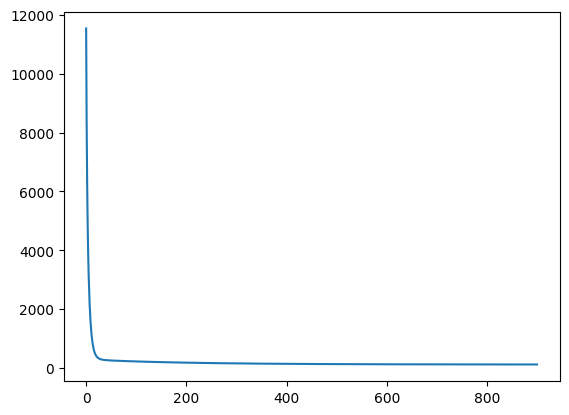

In [ ]:
model = multivLin_Reg()
model.fit(X_1, Y_1)

In [ ]:
X_test = test[0:5000]

In [ ]:
model.predict(X_test)

array([[191.40639331],
       [ 68.10609566],
       [ 42.38857316],
       ...,
       [101.3333039 ],
       [151.0526554 ],
       [215.64814924]])

In [ ]:
train.columns

Index(['feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6', 'feat_7',
       'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12', 'feat_13',
       'feat_14', 'feat_15', 'target'],
      dtype='object')

In [ ]:
train.isnull().sum().sum()

np.int64(0)

In [ ]:
for x in train.columns:
  print(x, type(train[x][1000]))

feat_1 <class 'numpy.float64'>
feat_2 <class 'numpy.float64'>
feat_3 <class 'numpy.float64'>
feat_4 <class 'numpy.float64'>
feat_5 <class 'numpy.float64'>
feat_6 <class 'numpy.float64'>
feat_7 <class 'numpy.float64'>
feat_8 <class 'numpy.float64'>
feat_9 <class 'numpy.float64'>
feat_10 <class 'numpy.float64'>
feat_11 <class 'numpy.float64'>
feat_12 <class 'numpy.float64'>
feat_13 <class 'numpy.float64'>
feat_14 <class 'numpy.float64'>
feat_15 <class 'numpy.float64'>
target <class 'numpy.float64'>


In [ ]:
Analysis = pd.DataFrame({
    "Maximum" : train.max(axis= 0),
    "Minimum" : train.min(axis= 0),
    "Mean" : train.mean(axis= 0),
    "Std Deviation" : train.std(axis= 0),
    "Median" : train.median(axis= 0)
})

In [ ]:
Analysis

,Maximum,Minimum,Mean,Std Deviation,Median
feat_1,5.0707,-4.3396,-0.003146,1.000367,-0.0028
feat_2,102.7671,-65.2074,15.408683,18.674270,15.4248
feat_3,4.6873,-4.7172,-0.001550,1.002076,-0.0022
feat_4,4.7051,-4.8234,0.000870,0.999129,0.0015
feat_5,4.6481,-4.6167,-0.001427,0.999973,-0.0018
feat_6,4.6874,-4.7171,-0.001450,1.002076,-0.0021
feat_7,4.7228,-4.5078,-0.001961,1.001628,-0.0024
feat_8,28776.0000,5289.0000,13300.472118,3407.265993,12900.0000
feat_9,224.2824,128.2567,174.701072,12.978940,174.5597
feat_10,3840.0000,67.0000,1541.739063,932.816717,1442.0000


feat_1


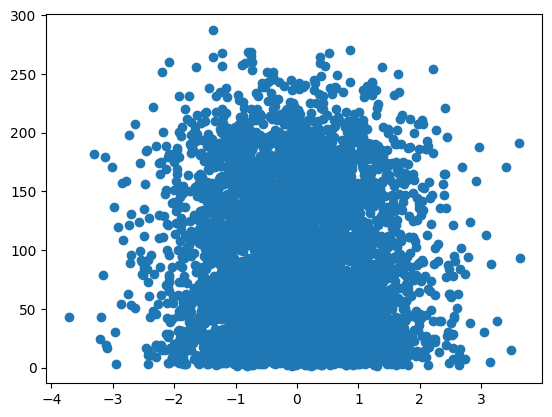

feat_2


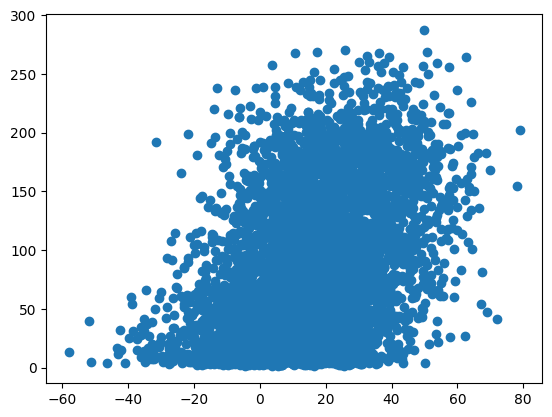

feat_3


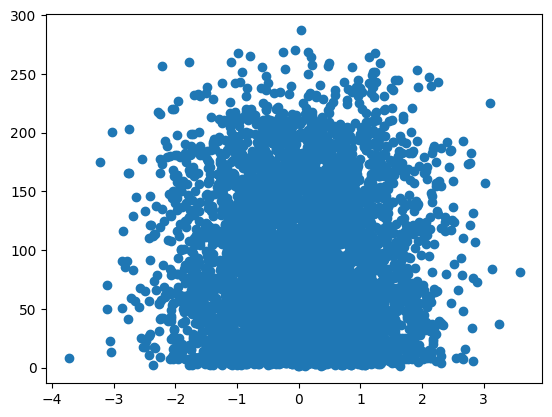

feat_4


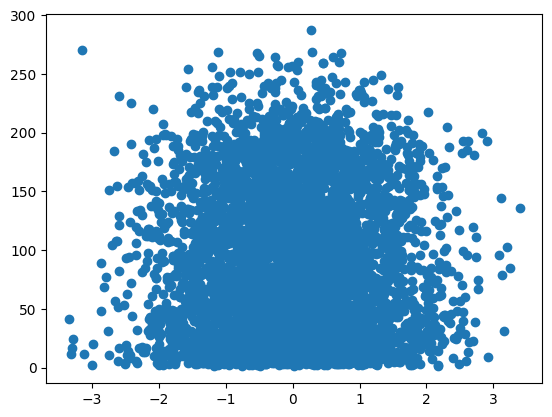

feat_5


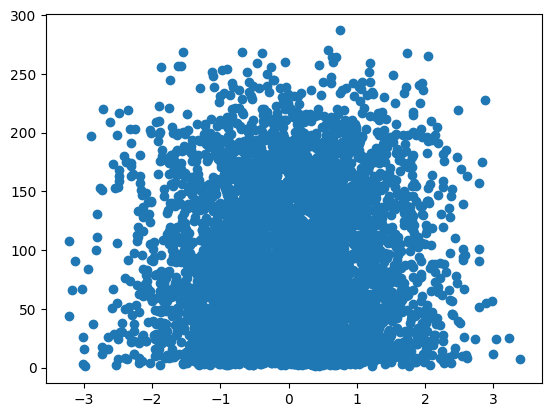

feat_6


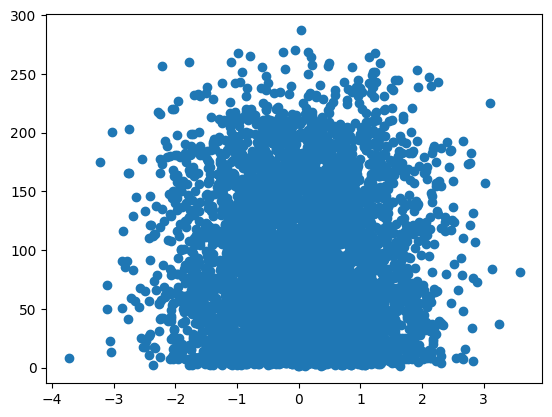

feat_7


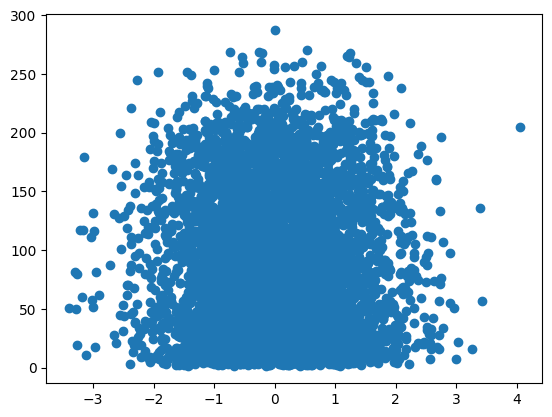

feat_8


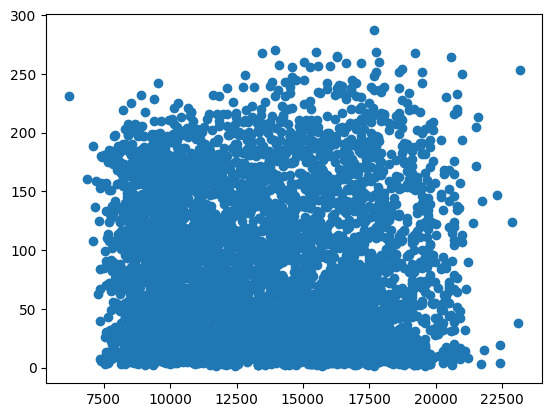

feat_9


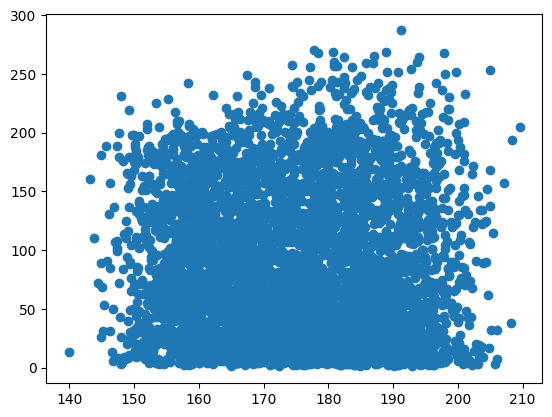

feat_10


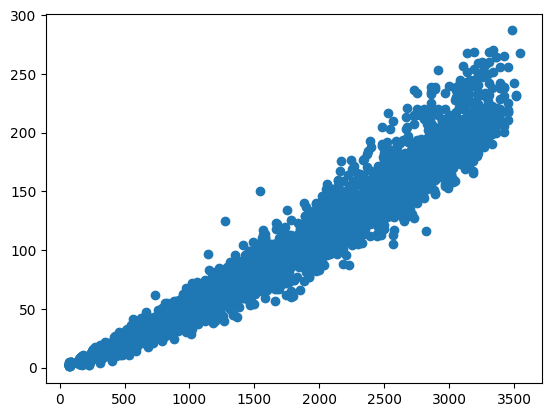

feat_11


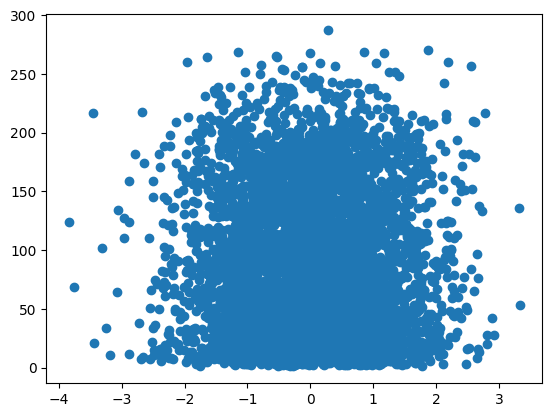

feat_12


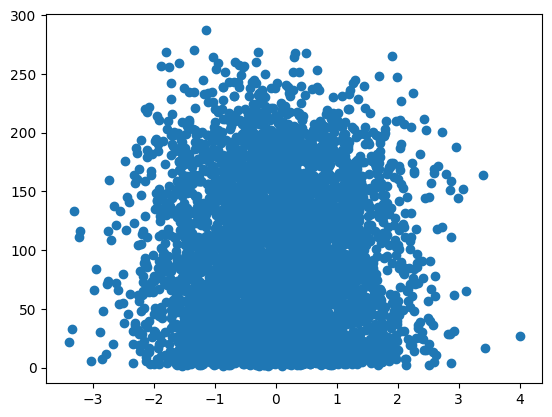

feat_13


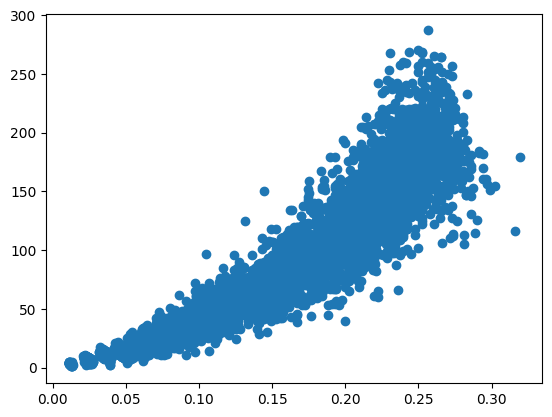

feat_14


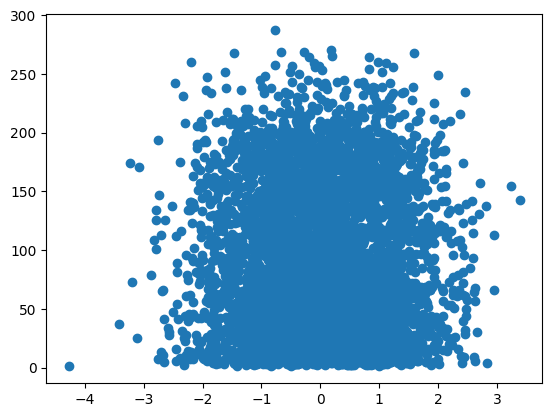

feat_15


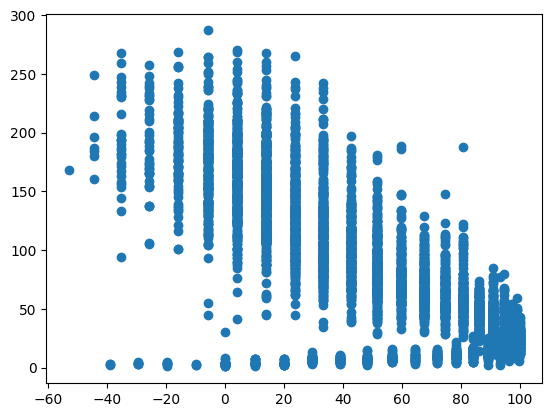

In [ ]:
for x in X_1.columns:
  plt.scatter(X_1[x], Y_1)
  print(x)
  plt.show()

In [ ]:
model.w

array([[-6.91437303e-02],
       [ 1.84563074e-01],
       [ 7.17811556e-02],
       [ 3.74395607e-03],
       [ 6.86482320e-02],
       [ 7.17811556e-02],
       [ 3.26461905e-02],
       [ 7.88256958e+00],
       [-6.48359001e+00],
       [ 8.03833398e+01],
       [ 7.89205672e-02],
       [-1.98776822e-01],
       [-2.17566049e+01],
       [-5.42381456e-02],
       [-1.45594812e+00]])

In [ ]:
test.shape

(150000, 15)

In [ ]:
corr = train.corr()